In [902]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [775]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

train_df['source'] = 'train'
test_df['source'] = 'test'

df = pd.concat([train_df, test_df], axis=0)


In [776]:
df.shape

(2919, 82)

In [777]:
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [778]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [779]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [780]:
df['source'].value_counts()

source
train    1460
test     1459
Name: count, dtype: int64

In [781]:
df.drop(columns=['Id'], inplace=True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [782]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [783]:
df['MSZoning'].value_counts()

MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

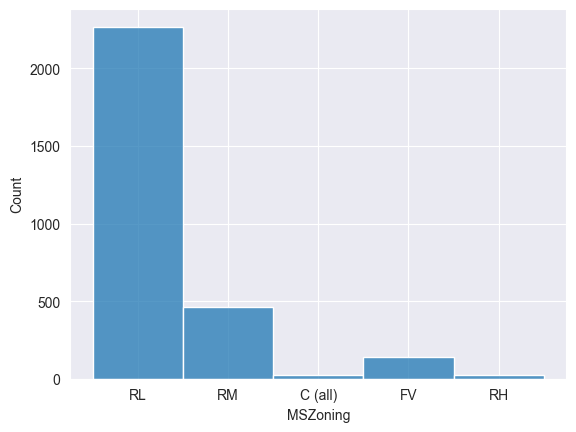

In [784]:
sns.histplot(df['MSZoning'])
plt.show()

In [785]:
# Define bins based on price tiers (adjust thresholds based on your data)

def price_based_binning(zone):
    zone_price = price_by_zone[zone]

    if zone_price > 200000:  # High price
        return 'High_Value'
    elif zone_price > 150000:  # Medium price
        return 'Medium_Value'
    else:  # Low price
        return 'Low_Value'

In [786]:
# First, calculate mean price by zone
price_by_zone = df.groupby('MSZoning')['SalePrice'].mean().sort_values(ascending=False)
print("Mean price by zone:")
print(price_by_zone)


Mean price by zone:
MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64


In [787]:
df['MSZoning_binned'] = df['MSZoning'].apply(price_based_binning)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,MSZoning_binned
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500.0,train,Medium_Value
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500.0,train,Medium_Value
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500.0,train,Medium_Value
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train,Medium_Value
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000.0,train,Medium_Value


In [788]:
#later on convert the binned values to numerical

In [789]:
#dealing with LotFrontage nillss
df['LotFrontage_was_missing'] = df['LotFrontage'].isnull().astype(int)


In [790]:
# Step 2: Work only with rows where LotFrontage is present and LotShape is regular
regular_lots = df[(df['LotFrontage'].notnull()) & (df['LotShape'] == 'Reg')].copy()

# Step 3: Estimate depth (LotArea / LotFrontage)
regular_lots['EstimatedDepth'] = regular_lots['LotArea'] / regular_lots['LotFrontage']

# Step 4: Calculate the median depth from these regular lots
median_depth = regular_lots['EstimatedDepth'].median()

# Optional: print it to understand what it is
print(f"Median estimated depth from regular lots: {median_depth:.2f} ft")


Median estimated depth from regular lots: 125.00 ft


In [791]:
# Step 5: Create mask for rows that are missing LotFrontage
missing_mask = df['LotFrontage'].isnull()

# Step 6: Apply logic to fill missing values
# If shape is 'Reg' → calculate using LotArea / median_depth
# Else → use median LotFrontage overall
lotfrontage_median = df['LotFrontage'].median()

# Fill missing values
df.loc[missing_mask & (df['LotShape'] == 'Reg'), 'LotFrontage'] = (
    df.loc[missing_mask & (df['LotShape'] == 'Reg'), 'LotArea'] / median_depth
)

In [792]:
# For remaining nulls (irregular shapes), fill with median
df.loc[missing_mask & (df['LotShape'] != 'Reg'), 'LotFrontage'] = lotfrontage_median

In [793]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,source,MSZoning_binned,LotFrontage_was_missing
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,0,2,2008,WD,Normal,208500.0,train,Medium_Value,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,0,5,2007,WD,Normal,181500.0,train,Medium_Value,0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,0,9,2008,WD,Normal,223500.0,train,Medium_Value,0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,0,2,2006,WD,Abnorml,140000.0,train,Medium_Value,0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,0,12,2008,WD,Normal,250000.0,train,Medium_Value,0


In [794]:
df.isnull().sum()

MSSubClass                    0
MSZoning                      0
LotFrontage                   0
LotArea                       0
Street                        0
                           ... 
SaleCondition                 0
SalePrice                  1459
source                        0
MSZoning_binned               0
LotFrontage_was_missing       0
Length: 83, dtype: int64

In [795]:
#now dealing with street
#we can encode it
df['Street_encoded'] = df['Street'].map({'Grvl': 0, 'Pave': 1})

In [796]:
#now handeling the alley similar approch as street just treat null values before that.
df['Alley_filled'] = df['Alley'].fillna('NoAlley')


In [797]:
df['Alley_encoded'] = df['Alley_filled'].map({'NoAlley': 0,'Grvl': 1,'Pave': 2})
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,YrSold,SaleType,SaleCondition,SalePrice,source,MSZoning_binned,LotFrontage_was_missing,Street_encoded,Alley_filled,Alley_encoded
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2008,WD,Normal,208500.0,train,Medium_Value,0,1,NoAlley,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,2007,WD,Normal,181500.0,train,Medium_Value,0,1,NoAlley,0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,2008,WD,Normal,223500.0,train,Medium_Value,0,1,NoAlley,0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,2006,WD,Abnorml,140000.0,train,Medium_Value,0,1,NoAlley,0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,2008,WD,Normal,250000.0,train,Medium_Value,0,1,NoAlley,0


In [798]:
df.isnull().sum()


MSSubClass                 0
MSZoning                   0
LotFrontage                0
LotArea                    0
Street                     0
                          ..
MSZoning_binned            0
LotFrontage_was_missing    0
Street_encoded             0
Alley_filled               0
Alley_encoded              0
Length: 86, dtype: int64

In [799]:
#now dealing with lot shape
lotshape_map = {
    'Reg': 3,
    'IR1': 2,
    'IR2': 1,
    'IR3': 0
}

df['LotShape_encoded'] = df['LotShape'].map(lotshape_map)


In [800]:
lotconfig_dummies = pd.get_dummies(df['LotConfig'], prefix='LotConfig')
df = pd.concat([df, lotconfig_dummies], axis=1)


In [801]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,LotFrontage_was_missing,Street_encoded,Alley_filled,Alley_encoded,LotShape_encoded,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,1,NoAlley,0,3,False,False,False,False,True
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,1,NoAlley,0,3,False,False,True,False,False
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,1,NoAlley,0,2,False,False,False,False,True
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,1,NoAlley,0,2,True,False,False,False,False
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,1,NoAlley,0,2,False,False,True,False,False


In [802]:
#First Binning LandContour
def bin_land_contour(val):
    if val == 'Lvl':
        return 'Flat'
    elif val in ['Bnk', 'HLS']:
        return 'Slight_Slope'
    elif val == 'Low':
        return 'Depressed'
    else:
        return 'Unknown'  # fallback (just in case)

df['LandContour_binned'] = df['LandContour'].apply(bin_land_contour)


In [803]:
#now label encode as there is a clear better option
land_contour_map = {'Flat': 2, 'Slight_Slope': 1, 'Depressed': 0}
df['LandContour_encoded'] = df['LandContour_binned'].map(land_contour_map)

In [804]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Alley_filled,Alley_encoded,LotShape_encoded,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandContour_binned,LandContour_encoded
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NoAlley,0,3,False,False,False,False,True,Flat,2
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NoAlley,0,3,False,False,True,False,False,Flat,2
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NoAlley,0,2,False,False,False,False,True,Flat,2
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NoAlley,0,2,True,False,False,False,False,Flat,2
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NoAlley,0,2,False,False,True,False,False,Flat,2


In [805]:
df['Utilities'].isnull().sum()

2

In [806]:
df['Utilities'].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [807]:
#from the above we can see that almost all the houses have all the utilities so there is less use keeping this field so we drop it.

In [808]:
df['LandSlope'].isnull().sum()

0

In [809]:
df['LandSlope'].value_counts()

LandSlope
Gtl    2778
Mod     125
Sev      16
Name: count, dtype: int64

In [810]:
LandSlope_map = {'Gtl': 0, 'Mod': 1, 'Sev': 2}
df['LandSlope_encoded'] = df['LandSlope'].map(LandSlope_map)

In [811]:
print(df['LandSlope'].unique())


['Gtl' 'Mod' 'Sev']


In [812]:
#now the important one neighborhood
#we do similar to MSZoning where we bin based on saleprice
price_by_neighborhood = df.groupby('Neighborhood')['SalePrice'].mean().sort_values()
print(price_by_neighborhood)

Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
OldTown    128225.300885
Sawyer     136793.135135
Blueste    137500.000000
SWISU      142591.360000
NPkVill    142694.444444
NAmes      145847.080000
Mitchel    156270.122449
SawyerW    186555.796610
NWAmes     189050.068493
Gilbert    192854.506329
Blmngtn    194870.882353
CollgCr    197965.773333
Crawfor    210624.725490
ClearCr    212565.428571
Somerst    225379.837209
Veenker    238772.727273
Timber     242247.447368
StoneBr    310499.000000
NridgHt    316270.623377
NoRidge    335295.317073
Name: SalePrice, dtype: float64


In [813]:
#Binning plus label encoding

neighborhood_map = {
    # Low Income
    'MeadowV': 'Low_Income',
    'IDOTRR': 'Low_Income',
    'BrDale': 'Low_Income',
    'BrkSide': 'Low_Income',
    'Edwards': 'Low_Income',
    'OldTown': 'Low_Income',

    # Mid Income
    'Sawyer': 'Mid_Income',
    'Blueste': 'Mid_Income',
    'SWISU': 'Mid_Income',
    'NPkVill': 'Mid_Income',
    'NAmes': 'Mid_Income',
    'Mitchel': 'Mid_Income',

    # High Income
    'SawyerW': 'High_Income',
    'NWAmes': 'High_Income',
    'Gilbert': 'High_Income',
    'Blmngtn': 'High_Income',
    'CollgCr': 'High_Income',
    'Crawfor': 'High_Income',
    'ClearCr': 'High_Income',
    'Somerst': 'High_Income',

    # Elite Income
    'Veenker': 'Elite_Income',
    'Timber': 'Elite_Income',
    'StoneBr': 'Elite_Income',
    'NridgHt': 'Elite_Income',
    'NoRidge': 'Elite_Income'
}

df['Neighborhood_binned'] = df['Neighborhood'].map(neighborhood_map)

# Now label encode
income_map = {
    'Low_Income': 0,
    'Mid_Income': 1,
    'High_Income': 2,
    'Elite_Income': 3
}
df['Neighborhood_encoded'] = df['Neighborhood_binned'].map(income_map)


In [814]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandContour_binned,LandContour_encoded,LandSlope_encoded,Neighborhood_binned,Neighborhood_encoded
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,False,False,False,False,True,Flat,2,0,High_Income,2
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,False,False,True,False,False,Flat,2,0,Elite_Income,3
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,False,False,False,False,True,Flat,2,0,High_Income,2
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,True,False,False,False,False,Flat,2,0,High_Income,2
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,False,False,True,False,False,Flat,2,0,Elite_Income,3


In [815]:
df['Condition1'].isnull().sum()

0

In [816]:
#similar to neighbourdhood
def bin_condition(val):
    if val in ['PosN', 'PosA']:
        return 'Positive'
    elif val == 'Norm':
        return 'Neutral'
    else:
        return 'Negative'

df['Condition1_binned'] = df['Condition1'].apply(bin_condition)

# Label encode
condition_map = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}
df['Condition1_encoded'] = df['Condition1_binned'].map(condition_map)


In [817]:
df.groupby('Condition1_binned')['SalePrice'].mean()


Condition1_binned
Negative    149046.971098
Neutral     184495.492063
Positive    218351.851852
Name: SalePrice, dtype: float64

In [818]:
df['Condition2'].isnull().sum()


0

In [819]:
#similar to cond1
def bin_condition(val):
    if val in ['PosN', 'PosA']:
        return 'Positive'
    elif val == 'Norm':
        return 'Neutral'
    else:
        return 'Negative'

df['Condition2_binned'] = df['Condition2'].apply(bin_condition)

# Label encode
condition_map = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2
}
df['Condition2_encoded'] = df['Condition2_binned'].map(condition_map)


In [820]:
df.groupby('Condition2_binned')['SalePrice'].mean()


Condition2_binned
Negative    121700.416667
Neutral     181169.405536
Positive    298250.000000
Name: SalePrice, dtype: float64

In [821]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,LotConfig_Inside,LandContour_binned,LandContour_encoded,LandSlope_encoded,Neighborhood_binned,Neighborhood_encoded,Condition1_binned,Condition1_encoded,Condition2_binned,Condition2_encoded
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,True,Flat,2,0,High_Income,2,Neutral,1,Neutral,1
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,False,Flat,2,0,Elite_Income,3,Negative,0,Neutral,1
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,True,Flat,2,0,High_Income,2,Neutral,1,Neutral,1
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,False,Flat,2,0,High_Income,2,Neutral,1,Neutral,1
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,False,Flat,2,0,Elite_Income,3,Neutral,1,Neutral,1


In [822]:
df['BldgType'].isnull().sum()

0

In [823]:
df['BldgType'].value_counts()

BldgType
1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: count, dtype: int64

In [824]:
def bin_bldg_type(val):
    if val == '1Fam':
        return 'Single_Family'
    elif val in ['TwnhsE', 'TwnhsI']:
        return 'Townhouse'
    else:
        return 'Multi_Family'

df['BldgType_binned'] = df['BldgType'].apply(bin_bldg_type)

# Ordinal encode
bldg_type_map = {
    'Multi_Family': 0,
    'Townhouse': 1,
    'Single_Family': 2
}
df['BldgType_encoded'] = df['BldgType_binned'].map(bldg_type_map)


In [825]:
df['HouseStyle'].isnull().sum()
df['HouseStyle'].value_counts()

HouseStyle
1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

In [826]:
def bin_house_style(val):
    if val == '1Story':
        return 'Single_Story'
    elif val in ['1.5Fin', '1.5Unf']:
        return 'OneHalf'
    elif val in ['2Story', '2.5Fin', '2.5Unf']:
        return 'TwoStory'
    else:
        return 'Split'

df['HouseStyle_binned'] = df['HouseStyle'].apply(bin_house_style)

# Label encode
house_style_map = {
    'Split': 0,
    'OneHalf': 1,
    'Single_Story': 2,
    'TwoStory': 3
}
df['HouseStyle_encoded'] = df['HouseStyle_binned'].map(house_style_map)


In [827]:
house_style_map = {
    'OneHalf': 0,
    'Split': 1,
    'Single_Story': 2,
    'TwoStory': 3
}
df['HouseStyle_encoded'] = df['HouseStyle_binned'].map(house_style_map)


In [828]:
df.groupby('HouseStyle_binned')['SalePrice'].mean()


HouseStyle_binned
OneHalf         140369.511905
Single_Story    175985.477961
Split           155230.156863
TwoStory        208973.997845
Name: SalePrice, dtype: float64

In [829]:
df['OverallQual'].isnull().sum()
df['OverallQual'].value_counts()

OverallQual
5     825
6     731
7     600
8     342
4     226
9     107
3      40
10     31
2      13
1       4
Name: count, dtype: int64

In [830]:
df.isnull().sum()

MSSubClass            0
MSZoning              0
LotFrontage           0
LotArea               0
Street                0
                     ..
Condition2_encoded    0
BldgType_binned       0
BldgType_encoded      0
HouseStyle_binned     0
HouseStyle_encoded    0
Length: 105, dtype: int64

In [831]:
#not necessay what is bellow but it is a nice thing to have
def bin_year(year):
    if year < 1940:
        return 'Pre_1940'
    elif year < 1960:
        return '1940s_50s'
    elif year < 1980:
        return '60s_70s'
    elif year < 2000:
        return '80s_90s'
    elif year < 2010:
        return '2000s'
    else:
        return '2010s_Plus'

df['YearBuilt_binned'] = df['YearBuilt'].apply(bin_year)
df['YearRemodAdd_binned'] = df['YearRemodAdd'].apply(bin_year)


In [832]:
#new feature alerttt
df['YearsSinceRemod'] = df['YrSold'] - df['YearRemodAdd']

In [833]:
df['RoofMatl'].value_counts()

RoofMatl
CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [834]:
roof_style_map = {
    'Flat': 'Basic',
    'Gable': 'Basic',
    'Shed': 'Basic',
    'Hip': 'Mid',
    'Gambrel': 'Mid',
    'Mansard': 'Luxury'
}

df['RoofStyle_binned'] = df['RoofStyle'].map(roof_style_map)

# Label encode it
roof_style_encoded = {
    'Basic': 0,
    'Mid': 1,
    'Luxury': 2
}

df['RoofStyle_encoded'] = df['RoofStyle_binned'].map(roof_style_encoded)


In [835]:
#we can drop the roof material as the variance it will give is very very low

In [836]:
df['Exterior1st'] = df['Exterior1st'].fillna(df['Exterior1st'].mode()[0])
df['Exterior2nd'] = df['Exterior2nd'].fillna(df['Exterior2nd'].mode()[0])


In [837]:
df['ExteriorCombo'] = df['Exterior1st'].astype(str) + '_' + df['Exterior2nd'].astype(str)


In [838]:
combo_price = df.groupby('ExteriorCombo')['SalePrice'].mean().sort_values()
combo_price_bins = pd.qcut(combo_price, q=4, labels=['Low', 'Med', 'High', 'Elite'])

# Map each combo to bin
combo_to_bin = combo_price_bins.to_dict()
df['ExteriorCombo_binned'] = df['ExteriorCombo'].map(combo_to_bin)


In [839]:
combo_encode = {'Low': 0, 'Med': 1, 'High': 2, 'Elite': 3}
df['ExteriorCombo_encoded'] = df['ExteriorCombo_binned'].map(combo_encode)


In [840]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)


In [841]:
df.loc[(df['MasVnrType'] == 'None') & (df['MasVnrArea'] > 0)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,HouseStyle_binned,HouseStyle_encoded,YearBuilt_binned,YearRemodAdd_binned,YearsSinceRemod,RoofStyle_binned,RoofStyle_encoded,ExteriorCombo,ExteriorCombo_binned,ExteriorCombo_encoded
624,60,RL,80.0,10400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TwoStory,3,60s_70s,60s_70s,34,Basic,0,VinylSd_VinylSd,Elite,3.0
773,20,RL,70.0,10150,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Single_Story,2,1940s_50s,1940s_50s,49,Basic,0,Wd Sdng_Wd Sdng,Med,1.0
1230,90,RL,68.0,18890,Pave,NaN,IR1,Lvl,AllPub,Inside,...,OneHalf,0,60s_70s,60s_70s,30,Basic,0,Plywood_Plywood,High,2.0
1300,60,RL,68.0,10762,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,TwoStory,3,80s_90s,80s_90s,10,Basic,0,VinylSd_VinylSd,Elite,3.0
1334,160,RM,24.0,2368,Pave,NaN,Reg,Lvl,AllPub,Inside,...,TwoStory,3,60s_70s,60s_70s,39,Basic,0,HdBoard_HdBoard,High,2.0
209,20,RL,102.0,13514,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Single_Story,2,2000s,2000s,1,Mid,1,VinylSd_VinylSd,Elite,3.0
992,20,RM,52.0,8626,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Single_Story,2,1940s_50s,1940s_50s,51,Basic,0,MetalSd_MetalSd,High,2.0
1150,20,RL,124.0,27697,Pave,NaN,Reg,Lvl,AllPub,Inside,...,Single_Story,2,60s_70s,60s_70s,46,Basic,0,Plywood_Plywood,High,2.0


In [842]:
# Find mode type where MasVnrArea > 0
most_common_type = df.loc[df['MasVnrArea'] > 0, 'MasVnrType'].mode()[0]

# Fix inconsistency rows
df.loc[(df['MasVnrType'] == 'None') & (df['MasVnrArea'] > 0), 'MasVnrType'] = most_common_type


In [843]:
masonry_price = df.groupby('MasVnrType')['SalePrice'].mean()
masonry_bins = pd.qcut(masonry_price, q=3, labels=['Basic', 'Mid', 'Luxury'])
masonry_map = masonry_bins.to_dict()

df['MasVnrType_binned'] = df['MasVnrType'].map(masonry_map)
type_encode = {'Basic': 0, 'Mid': 1, 'Luxury': 2}
df['MasVnrType_encoded'] = df['MasVnrType_binned'].map(type_encode)


In [844]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,YearBuilt_binned,YearRemodAdd_binned,YearsSinceRemod,RoofStyle_binned,RoofStyle_encoded,ExteriorCombo,ExteriorCombo_binned,ExteriorCombo_encoded,MasVnrType_binned,MasVnrType_encoded
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,2000s,2000s,5,Basic,0,VinylSd_VinylSd,Elite,3.0,Luxury,2
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,60s_70s,60s_70s,31,Basic,0,MetalSd_MetalSd,High,2.0,Basic,0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,2000s,2000s,6,Basic,0,VinylSd_VinylSd,Elite,3.0,Luxury,2
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,Pre_1940,60s_70s,36,Basic,0,Wd Sdng_Wd Shng,Med,1.0,Basic,0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,2000s,2000s,8,Basic,0,VinylSd_VinylSd,Elite,3.0,Luxury,2


In [845]:
ordinal_map = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

df['ExterQual_encoded'] = df['ExterQual'].map(ordinal_map)
df['ExterCond_encoded'] = df['ExterCond'].map(ordinal_map)


In [846]:
def foundation_binner(x):
    if x in ['Wood', 'Stone']:
        return 'Basic'
    elif x in ['Slab', 'CBlock']:
        return 'Mid'
    else:
        return 'Strong'

df['Foundation_binned'] = df['Foundation'].apply(foundation_binner)
df['Foundation_encoded'] = df['Foundation_binned'].map({'Basic': 0, 'Mid': 1, 'Strong': 2})


In [847]:
# Step 0: Fill all NA values in ordinal basement features with 'NA' string
bsmt_ordinal_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[bsmt_ordinal_cols] = df[bsmt_ordinal_cols].fillna('NA')

In [848]:
# Step 1: Define mappings for ordinal basement features
bsmt_qual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
bsmt_cond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0}
bsmt_expo_map = {'Gd': 3, 'Av': 2, 'Mn': 1, 'No': 0, 'NA': 0}
bsmt_fintype_map = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0}


In [849]:
# Step 2: Apply mapping to each column
df['BsmtQual_encoded'] = df['BsmtQual'].map(bsmt_qual_map)
df['BsmtCond_encoded'] = df['BsmtCond'].map(bsmt_cond_map)
df['BsmtExposure_encoded'] = df['BsmtExposure'].map(bsmt_expo_map)
df['BsmtFinType1_encoded'] = df['BsmtFinType1'].map(bsmt_fintype_map)
df['BsmtFinType2_encoded'] = df['BsmtFinType2'].map(bsmt_fintype_map)

In [850]:
# Step 3: Handle the numerical basement area columns
bsmt_area_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']
df[bsmt_area_cols] = df[bsmt_area_cols].fillna(0)

In [851]:
#combined features hehe
df['TotalBsmtFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df['BsmtOverallQual'] = df['BsmtQual_encoded'] + df['BsmtCond_encoded']

In [852]:
df.isnull().sum()

MSSubClass              0
MSZoning                0
LotFrontage             0
LotArea                 0
Street                  0
                       ..
BsmtExposure_encoded    0
BsmtFinType1_encoded    0
BsmtFinType2_encoded    0
TotalBsmtFinSF          0
BsmtOverallQual         0
Length: 126, dtype: int64

In [853]:
df['Heating'].value_counts()

Heating
GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: count, dtype: int64

In [854]:
heating_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
df['HeatingQC_encoded'] = df['HeatingQC'].map(heating_map)


In [855]:
df['CentralAir_encoded'] = df['CentralAir'].map({'Y': 1, 'N': 0})


In [856]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df = pd.get_dummies(df, columns=['Electrical'], prefix='Elec')  # or label encode if preferred


In [857]:
#we can drop heating due to low variance

In [858]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,BsmtFinType2_encoded,TotalBsmtFinSF,BsmtOverallQual,HeatingQC_encoded,CentralAir_encoded,Elec_FuseA,Elec_FuseF,Elec_FuseP,Elec_Mix,Elec_SBrkr
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,1,706.0,7,5,1,False,False,False,False,True
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,1,978.0,7,5,1,False,False,False,False,True
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,1,486.0,7,5,1,False,False,False,False,True
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,1,216.0,7,4,1,False,False,False,False,True
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,1,655.0,7,5,1,False,False,False,False,True


In [859]:
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)


In [860]:
df['TotalLivingSF'] = df['GrLivArea'] + df['TotalBsmtSF']
#to prevent data leakage  GrLivArea, 1stFlrSF, 2ndFlrSF

In [861]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']


In [862]:
df['GarageScore'] = df['GarageCars'] * df['GarageArea']


In [863]:
KitchenQual_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1
}
df['KitchenQual_encoded'] = df['KitchenQual'].map(KitchenQual_map)


In [864]:
functional_map = {
    'Sal': 0,  # Salvage only
    'Sev': 1,  # Severely Damaged
    'Maj2': 2, # Major Deductions 2
    'Maj1': 3, # Major Deductions 1
    'Mod': 4,  # Moderate Deductions
    'Min2': 5, # Minor Deductions 2
    'Min1': 6, # Minor Deductions 1
    'Typ': 7   # Typical
}
df['Functional_encoded'] = df['Functional'].map(functional_map)


In [865]:
df['Functional'] = df['Functional'].fillna('Typ')


In [866]:
fireplace_map = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    np.nan: 0  # or 'NA' if it exists as a string
}
df['FireplaceQu_encoded'] = df['FireplaceQu'].map(fireplace_map)


In [867]:
df['GarageCars'] = df['GarageCars'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)


In [868]:
# 1️⃣ Fill nulls with 'NoGarage' for categorical garage features
garage_cat_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cat_cols:
    df[col] = df[col].fillna('NoGarage')

In [869]:
# 2️⃣ Map ordinal values
garage_finish_map = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NoGarage': 0}
garage_qualcond_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NoGarage': 0}


In [870]:
df['GarageFinish_encoded'] = df['GarageFinish'].map(garage_finish_map)
df['GarageQual_encoded'] = df['GarageQual'].map(garage_qualcond_map)
df['GarageCond_encoded'] = df['GarageCond'].map(garage_qualcond_map)

In [871]:
# 3️⃣ Fill numerical nulls with 0 (No Garage)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)

In [872]:
#  drop original columns if encoded
df.drop(['GarageFinish', 'GarageQual', 'GarageCond'], axis=1, inplace=True)

In [873]:
# Fill NA with 'NoPool' and map ordinally
df['PoolQC'] = df['PoolQC'].fillna('NoPool')
poolqc_map = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'NoPool': 0}
df['PoolQC_encoded'] = df['PoolQC'].map(poolqc_map)


In [874]:
# Fill NA with 'NoFence' and map
df['Fence'] = df['Fence'].fillna('NoFence')
fence_map = {
    'GdPrv': 4,  # Good Privacy
    'MnPrv': 3,  # Minimum Privacy
    'GdWo': 2,   # Good Wood
    'MnWw': 1,   # Min Wood/Wire
    'NoFence': 0
}
df['Fence_encoded'] = df['Fence'].map(fence_map)


In [875]:
# Fill NA with 'None'
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# Optionally One-Hot Encode since it's not ordinal
# If you prefer binning, we can also do that.
# Here's One-Hot:
df = pd.get_dummies(df, columns=['MiscFeature'], prefix='Misc')


In [876]:
# Create a single datetime-ish column
df['SaleDate'] = pd.to_datetime(df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str), format='%Y-%m')

# Optional: Convert to numeric (timestamp or year/month period)
df['SaleYear'] = df['SaleDate'].dt.year
df['SaleMonth'] = df['SaleDate'].dt.month

# Or you can drop SaleDate after extracting if not needed


In [877]:
# Fill null with 'Oth' (makes sense for ambiguity)
df['SaleType'] = df['SaleType'].fillna('Oth')

# Binning manually or price-binning is optional. Let's one-hot encode:
df = pd.get_dummies(df, columns=['SaleType'], prefix='SaleType')


In [878]:
# Already no nulls usually, if any, fill with 'Normal' or 'Other'
df['SaleCondition'] = df['SaleCondition'].fillna('Normal')

# Optional binning:
# - Normal → 0
# - Abnorml, Family, Alloca → 1
# - Partial → 2
sale_condition_map = {
    'Normal': 0,
    'Abnorml': 1,
    'Family': 1,
    'Alloca': 1,
    'AdjLand': 2,
    'Partial': 3
}
df['SaleCondition_encoded'] = df['SaleCondition'].map(sale_condition_map)


In [879]:
# Check duplicate rows
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [880]:
#Some more feature engineering
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']
df['GarageAge'] = df['GarageAge'].replace(2020, 0)  # If no garage, yr was filled as 0
df['HouseAge']= df['YrSold'] - df['YearBuilt']
df['TotalBath'] = df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']) + df['FullBath'] + (0.5 * df['HalfBath'])
df['TotalPorchSF'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
df['TotalBsmtFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df['BsmtOverallQual'] = df['BsmtQual_encoded'] + df['BsmtCond_encoded']
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
df['HasGarage'] = df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)


In [881]:
# Only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr_matrix = numeric_df.corr()

# Correlation with SalePrice
corr_target = corr_matrix["SalePrice"].sort_values(ascending=False)

# Top 20 correlations (drop SalePrice itself)
top_corr_features = corr_target.drop('SalePrice').head(20)
print(top_corr_features)


OverallQual             0.790982
TotalLivingSF           0.778959
GrLivArea               0.708624
ExterQual_encoded       0.682639
GarageScore             0.680058
Neighborhood_encoded    0.673202
KitchenQual_encoded     0.659600
GarageCars              0.640409
TotalBath               0.631731
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
BsmtQual_encoded        0.585207
FullBath                0.560664
GarageFinish_encoded    0.549247
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
FireplaceQu_encoded     0.520438
YearRemodAdd            0.507101
BsmtOverallQual         0.485364
Name: SalePrice, dtype: float64


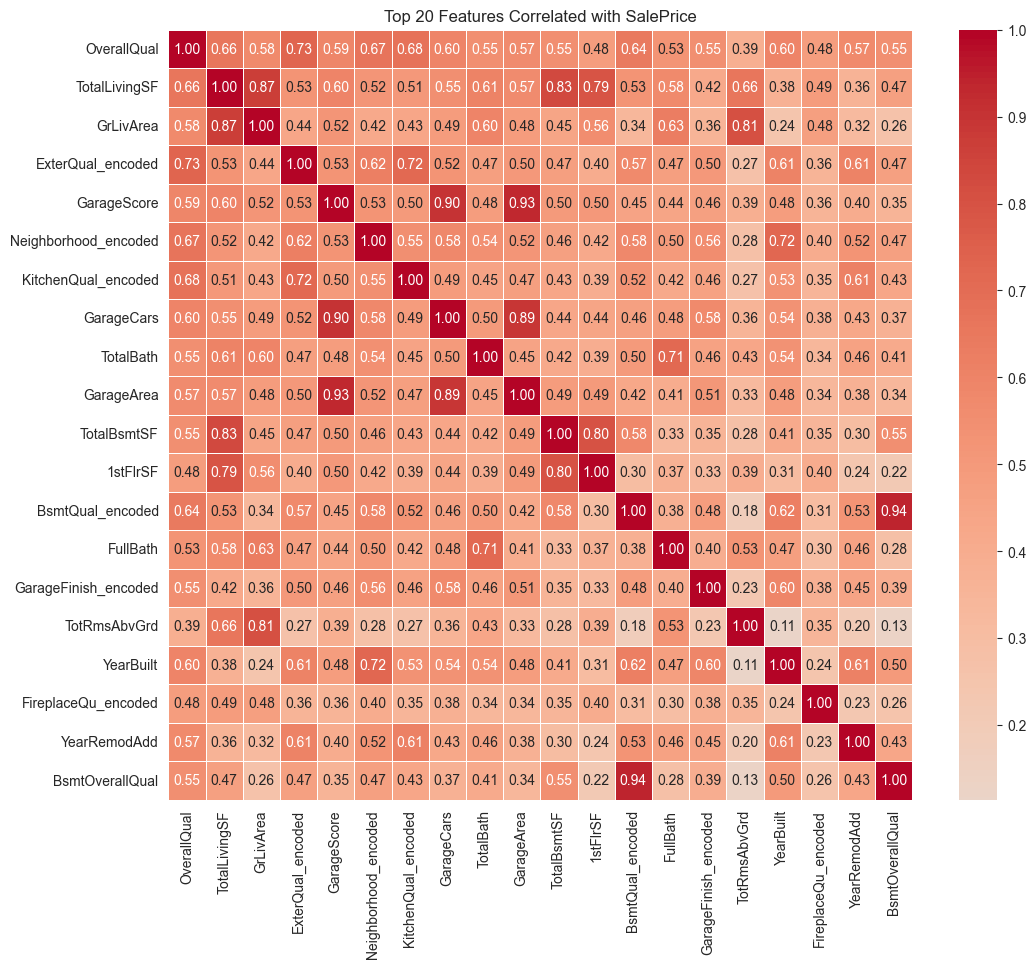

In [882]:
# Plot heatmap of just these top 20
top_features = top_corr_features.index
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df[top_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,center=0)
plt.title('Top 20 Features Correlated with SalePrice')
plt.show()

In [883]:
# Function to drop highly correlated features
def drop_highly_correlated(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

# Use it on numeric features
to_drop = drop_highly_correlated(numeric_df, threshold=0.9)
print("Highly correlated features to consider dropping:", to_drop)


Highly correlated features to consider dropping: ['YearsSinceRemod', 'TotalBsmtFinSF', 'BsmtOverallQual', 'HouseAge', 'RemodAge', 'GarageScore', 'GarageQual_encoded', 'GarageCond_encoded', 'GarageAge', 'HasPool', 'HasFireplace', 'HasGarage']


In [884]:
df['source'].value_counts()


source
train    1460
test     1459
Name: count, dtype: int64

In [885]:
Q1 = df['GrLivArea'].quantile(0.25)
Q3 = df['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['GrLivArea'] < (Q1 - 1.5 * IQR)) | (df['GrLivArea'] > (Q3 + 1.5 * IQR)))]
print(df)

      MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0             60       RL         65.0     8450   Pave   NaN      Reg   
1             20       RL         80.0     9600   Pave   NaN      Reg   
2             60       RL         68.0    11250   Pave   NaN      IR1   
3             70       RL         60.0     9550   Pave   NaN      IR1   
4             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
1454         160       RM         21.0     1936   Pave   NaN      Reg   
1455         160       RM         21.0     1894   Pave   NaN      Reg   
1456          20       RL        160.0    20000   Pave   NaN      Reg   
1457          85       RL         62.0    10441   Pave   NaN      Reg   
1458          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... SaleType_New SaleType_Oth  \
0            Lvl    AllPub    Inside  ...        Fal

<Axes: xlabel='GrLivArea'>

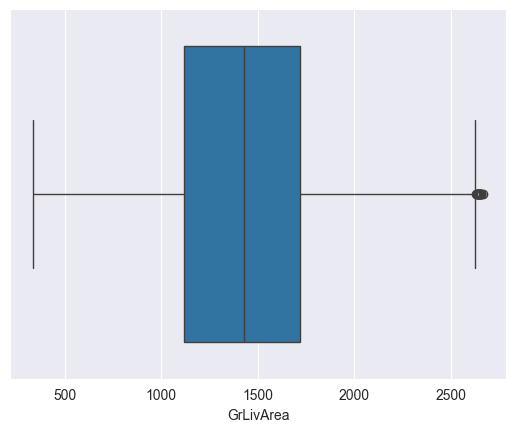

In [886]:
sns.boxplot(data=df, x='GrLivArea')

In [887]:
# Step 1: Keep original df
df_train = df[df['source'] == 'train'].copy()
df_test = df[df['source'] == 'test'].copy()

In [888]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [889]:
cols_to_check = ['GrLivArea', 'TotalBsmtSF', 'LotFrontage', 'LotArea', 'GarageScore', '1stFlrSF', 'SalePrice']
df_train_cleaned = remove_outliers_iqr(df_train, cols_to_check)

In [908]:
df['source'].value_counts()


source
test     1423
train    1422
Name: count, dtype: int64

In [909]:
features = [
    'OverallQual', 'TotalLivingSF', 'Neighborhood_encoded', 'YearBuilt',
    'GrLivArea', 'TotalBath', 'ExterQual_encoded', 'KitchenQual_encoded',
    'BsmtQual_encoded', 'FullBath', 'GarageScore', 'GarageCars',
    'GarageFinish_encoded', 'BsmtOverallQual', 'GarageArea',
    'YearRemodAdd', 'TotalBsmtSF', 'ExteriorCombo_encoded', '1stFlrSF',
    'HeatingQC_encoded', 'FireplaceQu_encoded', 'HasFireplace',
    'TotRmsAbvGrd', 'YearsSinceRemod', 'RemodAge', 'HouseAge'
]

target = 'SalePrice'



In [910]:
# Read the original train and test CSVs
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Mark source before combining
train_df['source'] = 'train'
test_df['source'] = 'test'


In [911]:
# Step 5: Select only required columns
selected_columns = features + [target, 'source']
df_selected = df[selected_columns]

In [912]:
# Step 6: Split back into train and test
train_df = df_selected[df_selected['source'] == 'train'].copy()
test_df = df_selected[df_selected['source'] == 'test'].copy()

In [913]:
# Drop helper column
train_df.drop(columns=['source'], inplace=True)
test_df.drop(columns=['source', target], inplace=True)

ValueError: Length mismatch: Expected 1423 rows, received array of length 1459

✅ submission.csv saved and ready for Kaggle!


C:\Users\tgija\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [897]:
# Step 7: Prepare X and y
train_X = train_df[features]
train_y = train_df[target]
test_X = test_df[features]

In [898]:
# Step 8: Scale the features
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [899]:
train_X_scaled_df = pd.DataFrame(train_X_scaled, columns=features)
test_X_scaled_df = pd.DataFrame(test_X_scaled, columns=features)


In [903]:
# Step 6: Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [905]:
# Step 7: Train and evaluate each model
print("Model Performance on Training Set:\n")
for name, model in models.items():
    model.fit(train_X_scaled, train_y)
    preds = model.predict(train_X_scaled)

    r2 = r2_score(train_y, preds)
    rmse = np.sqrt(mean_squared_error(train_y, preds))
    mae = mean_absolute_error(train_y, preds)

    print(f"🔹 {name}")
    print(f"   R² Score: {r2:.4f}")
    print(f"   RMSE: {rmse:.2f}")
    print(f"   MAE: {mae:.2f}\n")
    accuracy_percent = r2 * 100
    print(f"   ~Estimated Accuracy: {accuracy_percent:.2f}%")

Model Performance on Training Set:

🔹 Linear Regression
   R² Score: 0.8602
   RMSE: 26208.77
   MAE: 18630.93

   ~Estimated Accuracy: 86.02%
🔹 Random Forest
   R² Score: 0.9834
   RMSE: 9019.88
   MAE: 5992.12

   ~Estimated Accuracy: 98.34%
🔹 XGBoost
   R² Score: 0.9986
   RMSE: 2637.62
   MAE: 1854.97

   ~Estimated Accuracy: 99.86%
🔹 Gradient Boosting
   R² Score: 0.9458
   RMSE: 16319.34
   MAE: 11870.73

   ~Estimated Accuracy: 94.58%


In [915]:
# Use the filtered test_data's index to get the right Ids
test_data = df_selected[df_selected['source'] == 'test'].copy()
test_data.drop(columns=['source', target], inplace=True)

# Get the matching Ids from original test.csv (use index alignment)
original_test = pd.read_csv('test.csv')
test_ids = original_test.loc[test_data.index, 'Id'].values  # 💡 this ensures correct length!

# Extract features and scale
test_X = test_data[features].values
test_X_scaled = scaler.transform(test_X)

# Predict
xgb_model = models["XGBoost"]
test_preds = xgb_model.predict(test_X_scaled)

# Create submission
submission_df = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_preds
})

submission_df.to_csv('submission.csv', index=False)
print("✅ submission.csv saved and ready for Kaggle!")


✅ submission.csv saved and ready for Kaggle!


C:\Users\tgija\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [917]:
import pandas as pd
import numpy as np

# Step 1: Load train/test and combined df (you already did this earlier)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df['source'] = 'train'
test_df['source'] = 'test'
df = pd.concat([train_df, test_df], axis=0)

# Your feature list
features = [
    'OverallQual', 'TotalLivingSF', 'Neighborhood_encoded', 'YearBuilt',
    'GrLivArea', 'TotalBath', 'ExterQual_encoded', 'KitchenQual_encoded',
    'BsmtQual_encoded', 'FullBath', 'GarageScore', 'GarageCars',
    'GarageFinish_encoded', 'BsmtOverallQual', 'GarageArea',
    'YearRemodAdd', 'TotalBsmtSF', 'ExteriorCombo_encoded', '1stFlrSF',
    'HeatingQC_encoded', 'FireplaceQu_encoded', 'HasFireplace',
    'TotRmsAbvGrd', 'YearsSinceRemod', 'RemodAge', 'HouseAge'
]

target = 'SalePrice'

# Step 2: Select from combined df
df_selected = df[features + [target, 'source']]

# Step 3: Get test data with engineered features
test_data = df_selected[df_selected['source'] == 'test'].copy()
test_data.drop(columns=['source', target], inplace=True)

# ✅ This is the fix: use correct Ids by index alignment
original_test = pd.read_csv('test.csv')
test_ids = original_test.loc[test_data.index, 'Id'].values

# Step 4: Scale test data
test_X = test_data[features].values
test_X_scaled = scaler.transform(test_X)

# Step 5: Predict using your trained XGBoost model
xgb_model = models['XGBoost']
test_preds = xgb_model.predict(test_X_scaled)

# Step 6: Create submission file
submission_df = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_preds
})

# Step 7: Save to CSV
submission_df.to_csv('submission.csv', index=False)
print("✅ Final submission.csv created with 1459 rows!")


KeyError: "['TotalLivingSF', 'Neighborhood_encoded', 'TotalBath', 'ExterQual_encoded', 'KitchenQual_encoded', 'BsmtQual_encoded', 'GarageScore', 'GarageFinish_encoded', 'BsmtOverallQual', 'ExteriorCombo_encoded', 'HeatingQC_encoded', 'FireplaceQu_encoded', 'HasFireplace', 'YearsSinceRemod', 'RemodAge', 'HouseAge'] not in index"